efficientnet : model scaling하는 방법의 조합을 통해 성능을 높인다.
https://arxiv.org/abs/1905.11946

model scaling method
1. width
2. depth
3. resolution 

In [3]:
! pip install -U --pre efficientnet



In [0]:
%tensorflow_version 1.x

In [0]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import decode_predictions
from efficientnet.keras import center_crop_and_resize, preprocess_input
import os

In [41]:
model = efn.EfficientNetB3(weights='imagenet')

50094080/50086816 [==============================] - 2s 0us/step


In [36]:
from google.colab import files
uploaded = files.upload()

Saving whale_shark.jpeg to whale_shark.jpeg


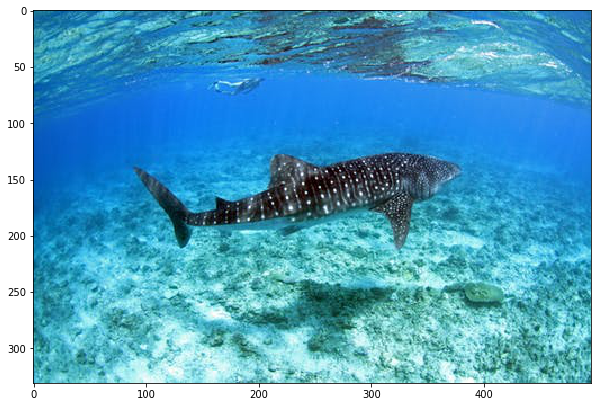

In [37]:
img = imread('whale_shark.jpeg')
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()

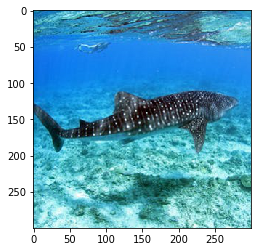

In [42]:
img_size = model.input_shape[1] #224크기
x = center_crop_and_resize(img, image_size=img_size)

plt.imshow(x.astype(np.uint8))
plt.show()


In [27]:
x = preprocess_input(x)
x = np.expand_dims(x, 0)
y = model.predict(x)
dy = decode_predictions(y)
print(dy)


[[('n01491361', 'tiger_shark', 0.4606443), ('n01484850', 'great_white_shark', 0.18462771), ('n02074367', 'dugong', 0.03642346), ('n01494475', 'hammerhead', 0.0206235), ('n02066245', 'grey_whale', 0.01415546)]]


In [0]:
def inference(model, image_path):
    image = imread(image_path)
    
    image_size = model.input_shape[1] # 224
    cx = center_crop_and_resize(image, image_size=image_size)
    
    x = preprocess_input(cx)
    x = np.expand_dims(x, 0)

    y = model.predict(x)
    dy = decode_predictions(y)[0]
    
    for idx, label, confidence in dy:
        print('%s: %.2f%%' % (label, confidence * 100))
    
    plt.figure(figsize=(5, 5))
    plt.imshow(cx.astype(np.uint8))
    plt.show()

tiger_shark: 84.88%
gar: 1.65%
sturgeon: 1.42%
electric_ray: 0.91%
barracouta: 0.70%


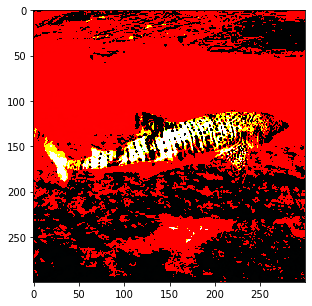

In [44]:
inference(model, 'whale_shark.jpeg')